In [3]:
import dame_flame
import numpy as np
import matplotlib.pyplot as plt


df,_ = dame_flame.utils.data.generate_binomial_decay_importance(50,50)

model = dame_flame.matching.FLAME(verbose=3, repeats=False)
model.fit(holdout_data=df)
result_flame = model.predict(df)


Iteration number:  1
	Number of matched groups formed in total:  20
	Unmatched treated units:  12 out of a total of  50 treated units
	Unmatched control units:  10 out of a total of  50 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  78
	Number of matches made so far:  78
	In this iteration, the covariates dropped are:  set()
Iteration number:  2
	Number of matched groups formed in total:  20
	Unmatched treated units:  12 out of a total of  50 treated units
	Unmatched control units:  10 out of a total of  50 control units
	Predictive error of covariates chosen this iteration:  1.2983982935281286
	Number of matches made in this iteration:  0
	Number of matches made so far:  78
	In this iteration, the covariates dropped are:  3
Iteration number:  3
	Number of matched groups formed in total:  22
	Unmatched treated units:  3 out of a total of  50 treated units
	Unmatched control units:  7 out of a total of  50 control unit

Iteration number:  10
	Number of matched groups formed in total:  23
	Unmatched treated units:  3 out of a total of  50 treated units
	Unmatched control units:  6 out of a total of  50 control units
	Predictive error of covariates chosen this iteration:  10.017031876819887
	Number of matches made in this iteration:  13
	Number of matches made so far:  91
	In this iteration, the covariates dropped are:  frozenset({'4', '1'})
95 units matched. We finished with no more treated units to match


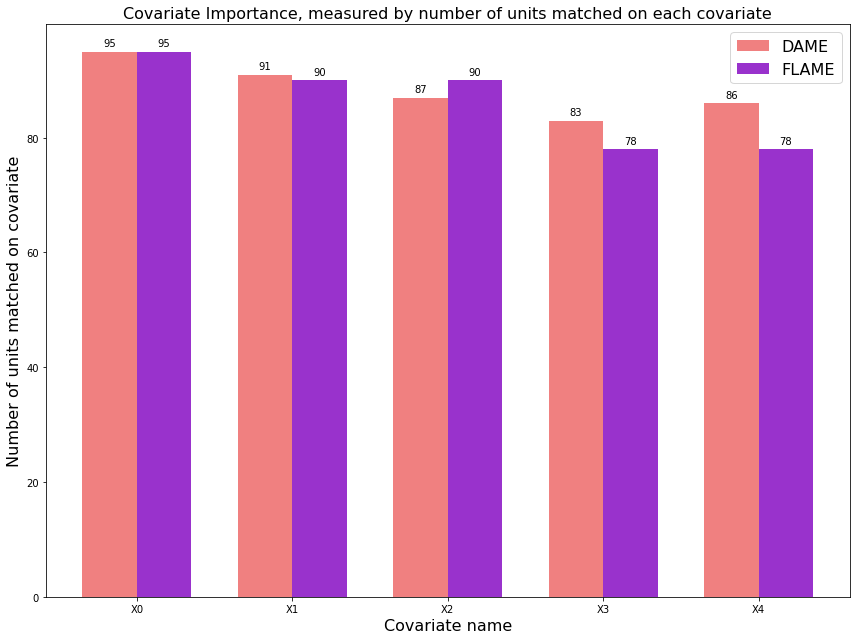

In [4]:
# Get matches using DAME and FLAME
model_dame = dame_flame.matching.DAME(repeats=False)
model_dame.fit(holdout_data=df)
result_dame = model_dame.predict(df)

# replace all the '*'s with NAs so we can get a count of the NAs. 
result_flame = result_flame.replace(to_replace='*', value=np.nan)
result_dame = result_dame.replace(to_replace='*', value=np.nan)

# rename columns for graph
X_columns = ["X" + col for col in result_flame.columns]
result_flame.columns = X_columns
result_dame.columns = X_columns

x = np.arange(len(result_flame.columns))  # the label locations
width = 0.35  # the width of the bars

f, ax = plt.subplots(figsize=(12,9))
rects1 = ax.bar(x - width/2,  result_dame.count(axis=0), width, color="lightcoral", label = "DAME" ) #, stopping at {}% control units matched".format(percent), hatch="/")
rects2 = ax.bar(x + width/2, result_flame.count(axis=0), width, color = "darkorchid", label = "FLAME") #, stopping at {}% control units matched".format(percent), hatch = "\\")
ax.set_ylabel('Number of units matched on covariate', fontsize=16)
ax.set_xlabel('Covariate name', fontsize=16)
ax.set_title('Covariate Importance, measured by number of units matched on each covariate', fontsize=16)

ax.set_xticks(x)
ax.set_xticklabels(result_flame.columns)
ax.legend(fontsize=16)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

f.tight_layout()

plt.savefig('interpretability.png')